이전 장에서 책의 내용을 이용해 한글 깨짐 현상을 수정하려 했지만 제대로 작동되지 않았다. 먼저 한글 깨짐 현상을 수정해보고 다른 내용을 알아보자<br>
아래 코드를 실행하고 런타임을 재시작해보자.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


런타임 재시작후 아래의 코드를 실행해주면 한글이 올바르게 출력된다.

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'NanumBarunGothic')

<h3> 면적 그래프 </h3>

**면적 그래프(area plot)**는 각 열의 데이터를 선 그래프로 구현하고 선 그래프와 x축 사이의 공간에 색을 입힌다. **kind 매개변수를 'area'로 지정**하면 된다. <br>
색의 투명도는 **alpha 매개변수**로 지정가능하며 기본값은 0.5이다. <br>
**stacked 매개변수**를 이용해 그래프를 누적할지 말지 정할 수 있다. 기본값은 True이며 각 열의 선 그래프를 다른 열의 선 그래프 위로 쌓아 올린다. 이런 그래프를 **누적 선 그래프(stacked line plot)**이라고 한다. False인 경우 각 선 그래프가 누적되지 않고 서로 겹치게 표시된다.

먼저 데이터를 불러오자

In [ ]:
import pandas as pd

df = pd.read_excel('시도별 전출입 인구수.xlsx', engine = 'openpyxl', header = 0)

df = df.fillna(method = 'ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리한다.
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
df_seoul.set_index(['전입지'], inplace = True)

df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도']]
df_4 = df_4.T

print(df_4.head())

전입지    충청남도   경상북도    강원도   전라남도
1970  15954  11868   9352  10513
1971  18943  16459  12885  16755
1972  23406  22073  13561  20157
1973  27139  27531  16481  22160
1974  25509  26902  15479  21314


먼저 skacked 매개변수를 False로 지정해보자.

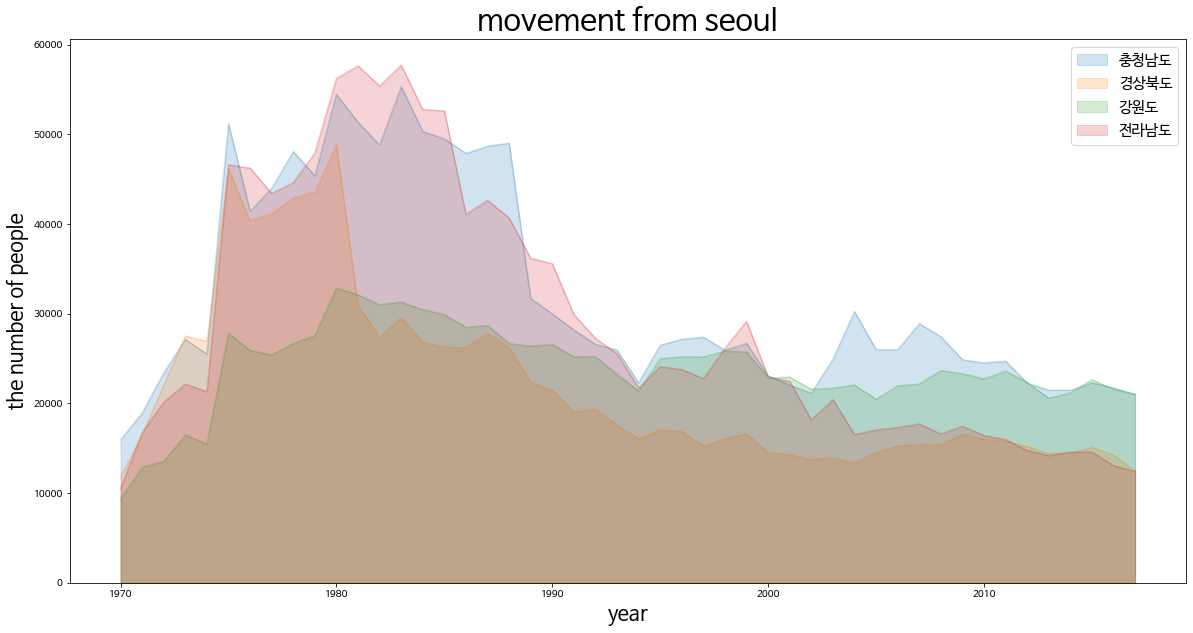

In [ ]:
# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind = 'area', stacked = False, alpha = 0.2, figsize = (20, 10))

plt.title('movement from seoul', size = 30)
plt.xlabel('year', size = 20)
plt.ylabel('the number of people', size = 20)
plt.legend(loc = 'best', fontsize = 15)

plt.show()

이번에는 stacked 매개변수를 True로 지정해 누적 선 그래프를 그려보자.

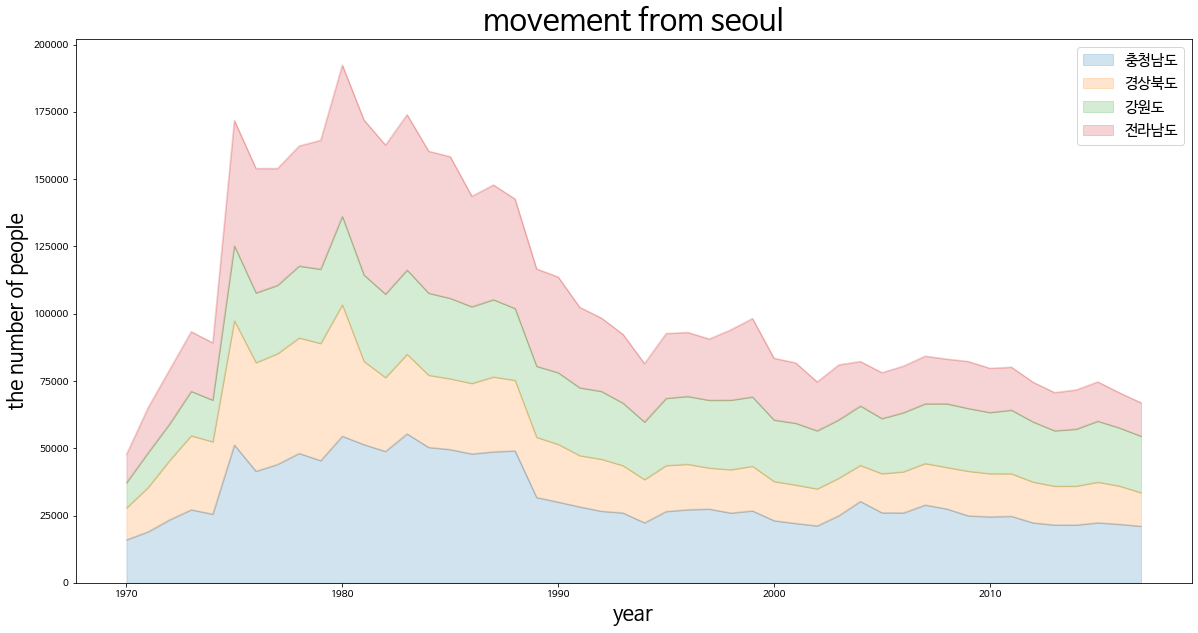

In [ ]:
df_4.plot(kind = 'area', stacked = True, alpha = 0.2, figsize = (20, 10))

plt.title('movement from seoul', size = 30)
plt.xlabel('year', size = 20)
plt.ylabel('the number of people', size = 20)
plt.legend(loc = 'best', fontsize = 15)

plt.show()

plot() 메소드로 생성된 그래프는 axe 객체이다. axe객체를 이용해 여러 세부적인 요소를 설정할 수 있다. 아래는 axe 객체를 이용해 제목, 축 이름 등을 설정한 코드이다.

<class 'matplotlib.axes._subplots.AxesSubplot'>


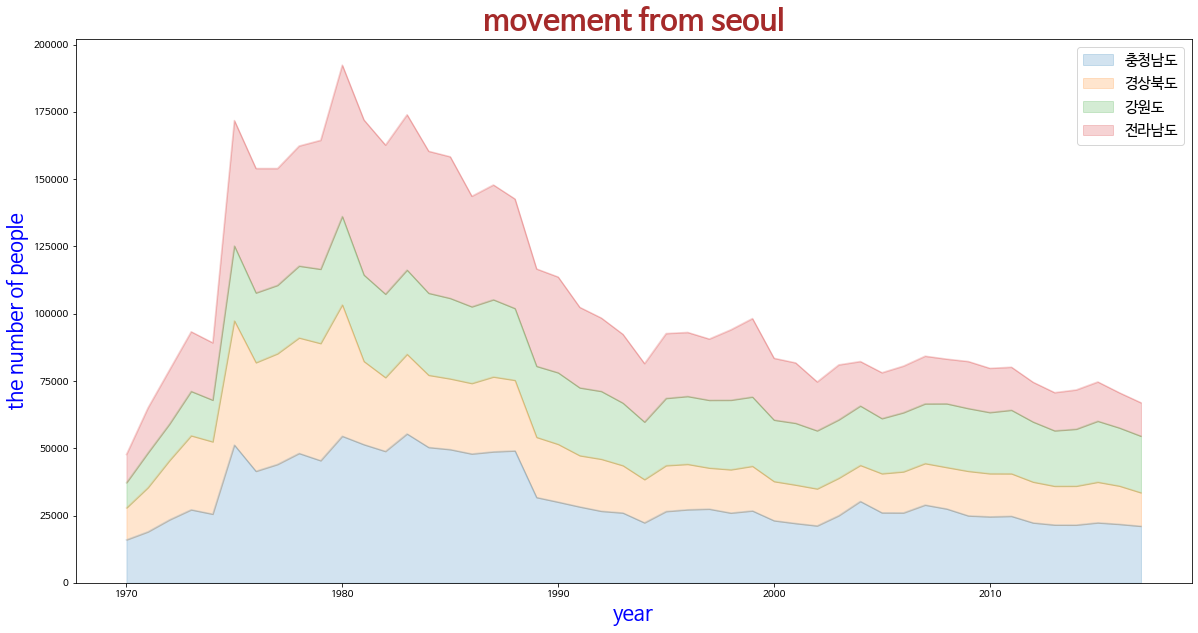

In [ ]:
ax = df_4.plot(kind = 'area', stacked = True, alpha = 0.2, figsize = (20, 10))
print(type(ax))

ax.set_title('movement from seoul', size = 30, color = 'brown', weight = 'bold')
ax.set_xlabel('year', size = 20, color = 'blue')
ax.set_ylabel('the number of people', size = 20, color = 'blue')
ax.legend(loc = 'best', fontsize = 15)

plt.show()

<h3> 막대 그래프 </h3>

막대 그래프(bar plot)는 plot 메소드에 **kind 매개변수를 'bar'로 지정**하면 된다. <br>
먼저 세로형 막대 그래프를 그려보자.

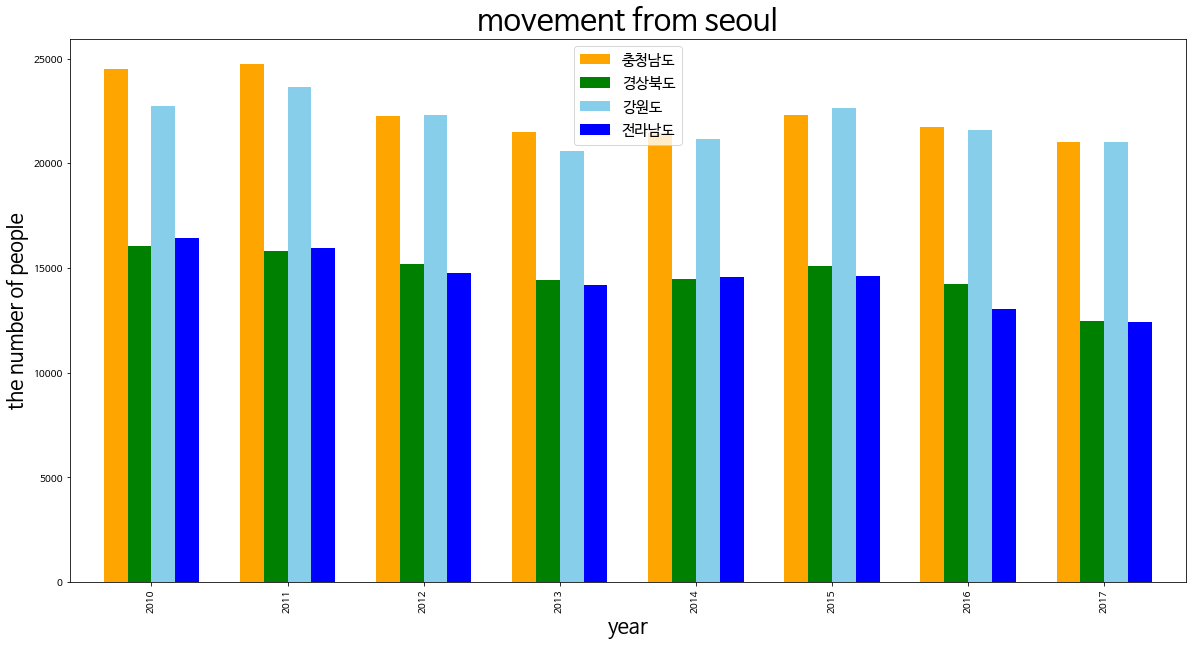

In [ ]:
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], '2010':'2017']
df_4 = df_4.transpose()
df_4.index = df_4.index.map(int)

df_4.plot(kind = 'bar', figsize = (20, 10), width = 0.7, color = ['orange', 'green', 'skyblue', 'blue'])

plt.title('movement from seoul', size = 30)
plt.xlabel('year', size = 20)
plt.ylabel('the number of people', size = 20)
plt.legend(loc = 'best', fontsize = 15)

plt.show()

kind를 **'barh'**로 지정하면 가로형 막대 그래프를 그릴 수 있다. <br>
먼저 각 행의 합계를 구하고 합계를 기반으로한 가로형 막대 그래프를 그려보자.

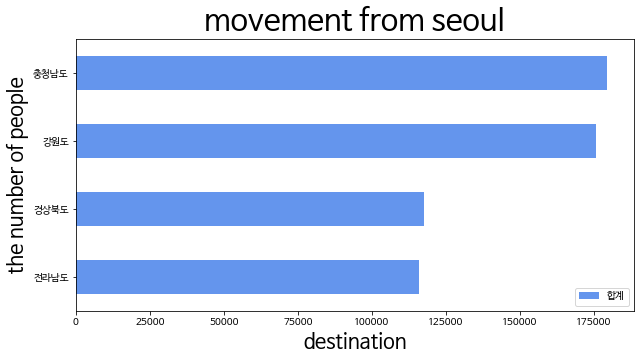

In [ ]:
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], '2010':'2017']

df_4['합계'] = df_4.sum(axis = 1)

df_total = df_4[['합계']].sort_values(by = '합계', ascending = True)

df_total.plot(kind = 'barh', color = 'cornflowerblue', width = 0.5, figsize = (10,5))

plt.title('movement from seoul', size = 30)
plt.xlabel('destination', size = 20)
plt.ylabel('the number of people', size = 20)

plt.show()

지금까지 그래프를 그릴 때 y축을 한 개만 사용했다. 이번에는 **보조축**을 추가해 2개의 y축을 이용해 그래프를 그려보자. 기존 축에는 막대 그래프의 값을 표시하고 보조 축에는 선 그래프의 값을 표시하기로 하자. <br>
막대 그래프는 연도별 북한의 발전량을 나타내고, 선 그래프는 북한 발전량의 전년 대비 증감률을 백분률로 나타낼 것이다.

axe 객체에 **twinx() 메소드**를 적용하면 axe 객체의 쌍둥이 객체를 만들고 쌍둥이 객체에 plot()함수를 적용하면 보조축을 이용해 그래프를 그릴 수 있다.

  전력량 (억㎾h) 발전 전력별 1990 1991 1992 1993 1994  ... 2010 2011 2012 2013 2014 2015 2016
5        북한     합계  277  263  247  221  231  ...  237  211  215  221  216  190  239
6       NaN     수력  156  150  142  133  138  ...  134  132  135  139  130  100  128
7       NaN     화력  121  113  105   88   93  ...  103   79   80   82   86   90  111
8       NaN    원자력    -    -    -    -    -  ...    -    -    -    -    -    -    -

[4 rows x 29 columns]


       1990 1991 1992 1993 1994 1995 1996  ... 2010 2011 2012 2013 2014 2015 2016
발전 전력별                                     ...                                   
합계      277  263  247  221  231  230  213  ...  237  211  215  221  216  190  239
수력      156  150  142  133  138  142  125  ...  134  132  135  139  130  100  128
화력      121  113  105   88   93   88   88  ...  103   79   80   82   86   90  111
원자력       -    -    -    -    -    -    -  ...    -    -    -    -    -    -    -

[4 rows x 27 columns]
발전 전력별 총발전량   수력   화력 원자력 총발전량 - 1년
1990

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


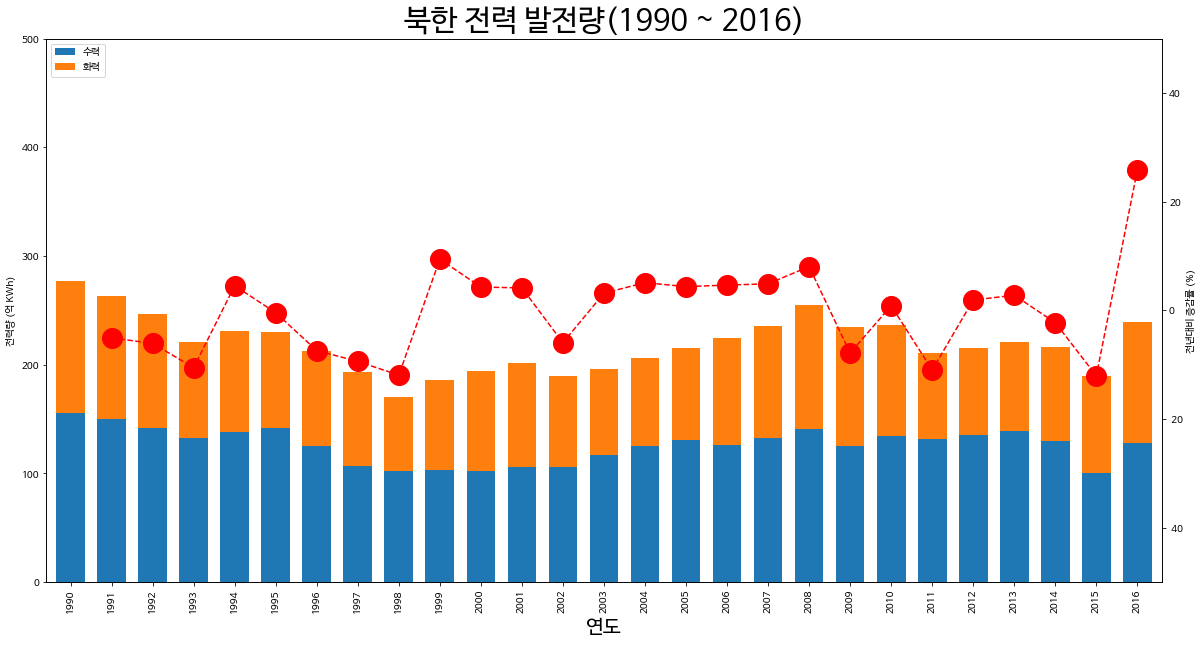

In [ ]:
df = pd.read_excel('남북한발전전력량.xlsx', engine = 'openpyxl', convert_float = True)
df = df.loc[5:9]
print(df.head()) 
print('\n')

df.drop('전력량 (억㎾h)', axis = 1, inplace = True)
df.set_index('발전 전력별', inplace = True)
print(df.head())
df = df.T

df = df.rename(columns = {'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
print(df.head())
print('\n')

df['증감률'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100
print(df.head())

ax1 = df[['수력', '화력']].plot(kind = 'bar', figsize = (20, 10), width = 0.7, stacked = True)
ax2 = ax1.twinx()
ax2.plot(df.index, df['증감률'], ls = '--', marker = 'o', markersize = 20, color = 'red', label = '전년대비 증감률 (%)')

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size = 20)
ax1.set_ylabel('전력량 (억 KWh)')
ax2.set_ylabel('전년대비 증감률 (%)')

plt.title('북한 전력 발전량(1990 ~ 2016)', size = 30)
ax1.legend(loc = 'upper left')

plt.show()

<h3> 히스토그램 </h3>

히스토그램을 그리기 위해서는 kind 매개변수를 **'hist'**로 지정하면 된다. <br>
**bins 매개변수**로 구간의 개수를 지정할 수 있다.

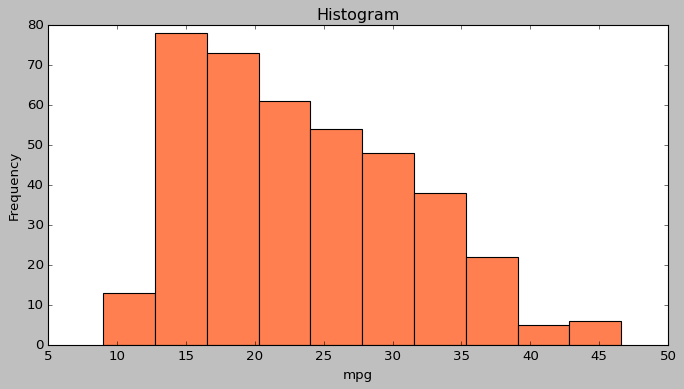

In [ ]:
df = pd.read_csv('auto-mpg.csv', header = None)

plt.style.use('classic')
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

df['mpg'].plot(kind = 'hist', bins = 10, color = 'coral', figsize = (10, 5))

plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

<h3> 산점도 <h3>

산점도를 이용하기 위해서는 kind 매개변수를 'scatter'로 지정하면 된다. <br>
x, y를 지정해 비교할 두 변수를 입력해준다. <br> 
c 매개변수로 점의 색상, s 매개변수로 점의 크기를 지정할 수 있다.

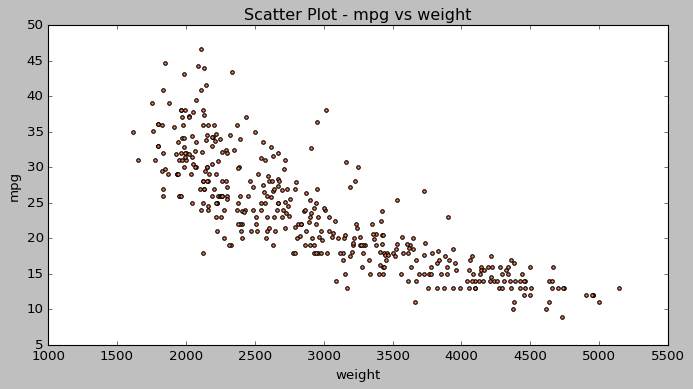

In [ ]:
df.plot(kind = 'scatter', x = 'weight', y = 'mpg', c = 'coral', s = 10, figsize = (10, 5))
plt.title('Scatter Plot - mpg vs weight')
plt.show()

산점도는 **점의 크기 또는 색상을 새로운 변수를 추가하여 표현할 수 있다**. <br>
'cylinders'에 저장된 실린더의 개수를 그대로 쓰기 보다 최대값 대비 상대적 크기를 나타내는 비율을 계산해 변수에 저장하고 이를 s 매개변수로 전달해보자. 값이 클수록 원의 크기가 큰 산점도가 만들어 질 것이다. 이렇게 점의 크기에 변화를 주는 그래프를 **버블(bubble) 차트**라고 부른다.

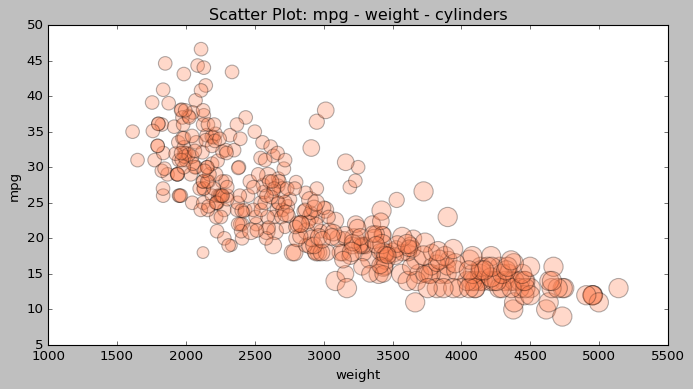

In [ ]:
cylinders_size = df.cylinders/df.cylinders.max() * 300

df.plot(kind = 'scatter', x = 'weight', y = 'mpg', c = 'coral', figsize = (10, 5), s = cylinders_size, alpha = 0.3)
plt.title('Scatter Plot: mpg - weight - cylinders')

plt.show()

Matplotlib 라이브러리로 생성한 그래프를 그림 파일로 저장하려면 **savefig() 함수**를 사용하면된다. 이름을 지정해주고 그림 배경을 투명하게 지정하려면 **transparent 매개변수**를 True로 지정해주면 된다. <br>
이번에는 산점도를 십자로 표현하기위해 **marker 매개변수**를 '+'로 지정하고, 색상을 정하는 **컬러맵(cmap)**으로 'viridis'를 사용해보자.

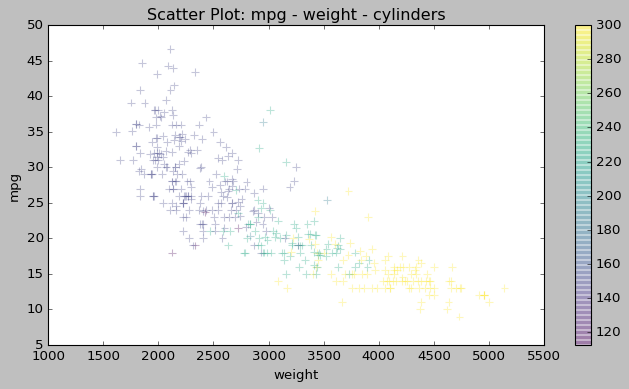

In [ ]:
cylinders_size = df.cylinders/df.cylinders.max() * 300

df.plot(kind = 'scatter', x = 'weight', y = 'mpg', marker = '+', figsize = (10, 5), cmap = 'viridis', c = cylinders_size, s = 50, alpha = 0.3)
plt.title('Scatter Plot: mpg - weight - cylinders')

plt.savefig("scatter.png")
plt.savefig("scatter_transparent.png", transparent = True)

plt.show()

<h3> 파이 차트 <h3>

파이 차트(pie chart)는 kind 매개변수를 **'pie'**로 지정하면 사용할 수 있다. <br>
먼저 데이터를 불러오고 'count'열을 추가해 모든 행에 값을 1로 넣어주자. 그리고 'origin' 열의 값인 '1'(USA), '2'(EU), '3'(JPN)을 기준으로 3개의 그룹으로 나누고, sum() 메소드를 사용해 각 그룹별 합계를 집계해보자.

In [ ]:
df = pd.read_csv('auto-mpg.csv', header = None)

plt.style.use('classic')
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

df['count'] = 1
df_origin = df.groupby('origin').sum() # origin 열을 기준으로 그룹화, 합계 연산
print(df_origin.head())

           mpg  cylinders  displacement  ...  acceleration  model year  count
origin                                   ...                                 
1       5000.8       1556       61229.5  ...        3743.4       18827    249
2       1952.4        291        7640.0  ...        1175.1        5307     70
3       2405.6        324        8114.0  ...        1277.6        6118     79

[3 rows x 7 columns]


count 역시 모두 합쳐졌으므로 count 열의 값은 origin 값의 개수가 된다. 이제 국가별 점유율을 나타내는 파이 차트를 그려보자. '%1.1f%%'는 숫자를 퍼센트로 나타내는데, 소수점 이하 첫째자리까지 표기한다는 뜻이다.

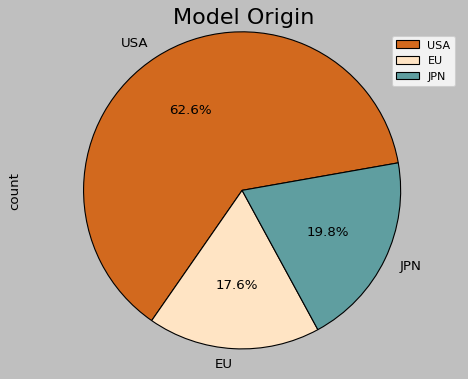

In [ ]:
df_origin.index = ['USA', 'EU', 'JPN']

df_origin['count'].plot(kind = 'pie',
                        figsize = (7,5),
                        autopct = '%1.1f%%', # 퍼센트 표시
                        startangle = 10,  # 파이 조각을 나누닌 시작점(각도 표시)
                        colors = ['chocolate', 'bisque', 'cadetblue'] # 색상 리스트
                        )

plt.style.use('default')
plt.title('Model Origin', size = 20)
plt.axis('equal')
plt.legend(labels = df_origin.index, loc = 'upper right')
plt.show()

<h3> 박스 플롯 <h3>

박스 플롯을 사용하려면 kind 매개변수를 **'box'**로 지정하면 된다. <br>
이번에는 axe 객체에 박스 플롯을 그려보자. axe 객체에 박스 플롯을 그리려면 **boxplot() 메소드**를 사용해야한다. <br>
수직 박스 플롯을 사용하기 위해서는 **vert 매개변수**를 True(기본값)로 지정하고, 수평 박스 플롯을 사용하려면 False로 지정하면 된다.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


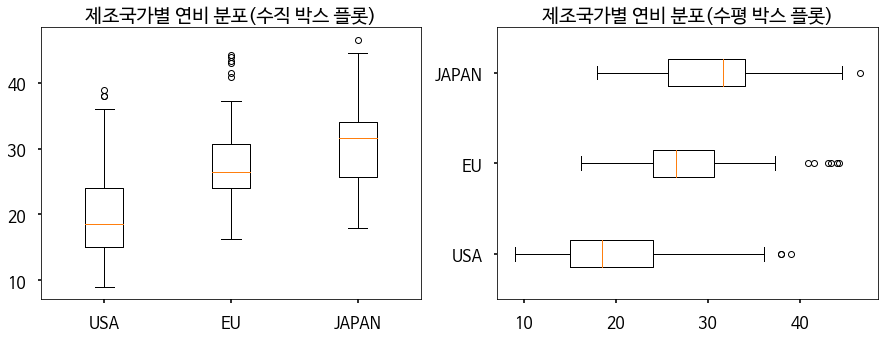

In [ ]:
plt.style.use('seaborn-poster')

df = pd.read_csv('auto-mpg.csv', header = None)
# plt.rcParams['axes.unicode_minus'] = False

df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.boxplot(x = [df[df['origin'] == 1]['mpg'],
                 df[df['origin'] == 2]['mpg'],
                 df[df['origin'] == 3]['mpg']],
            labels = ['USA', 'EU', 'JAPAN'])

ax2.boxplot(x = [df[df['origin'] == 1]['mpg'],
                 df[df['origin'] == 2]['mpg'],
                 df[df['origin'] == 3]['mpg']],
            labels = ['USA', 'EU', 'JAPAN'], vert = False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()